In [1]:
import os, sys, pygame, random, math, string
import pygame
from pygame.locals import *
from MeshViewer import Point3D, Face, Triangle, Quad, Object

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
def loadObj(filename,o):
    try:
        fp = open(filename, "r")
    except:
        print("File: " + filename + " not found")
        sys.exit(1)
    for line in fp:
        if line.startswith('#'): continue
        values = line.split()
        if not values: continue
        if values[0] == 'v':
            v = list(map(float, values[1:4]))
            o.points.append( Point3D(v[0],v[1],v[2]) )
        elif values[0] == 'f':
            p = []
            for v in values[1:]:
                w = v.split("/")
                p.append(w[0])
            #obj file uses 1 as base, adjust for indexing with -1
            o.faces.append( Triangle(int(p[0])-1,int(p[1])-1,int(p[2])-1))
    fp.close()
    return o

In [3]:
size = width, height = 600, 400
pygame.init()
screen = pygame.Surface((width, height))

In [4]:
class Env3D:
    def __init__(self,screen,winsize):
        self.winsize= winsize
        self.zoom_factor = 1
        self.light_vector_1 = Point3D (random.random(),random.random(),random.random())
        self.light_vector_1.normalize()
        self.light_vector_2 = Point3D (random.random(),random.random(),random.random())
        self.light_vector_2.normalize()
        self.screen = screen
        self.wincenter = [winsize[0]/2, winsize[1]/2]
        self.colorize = True

In [5]:
random.seed()
env3d = Env3D(screen,[width,height])

In [6]:
meshname = "cube.obj"
o = Object()
o.name = "Model"
o = loadObj(meshname, o)
o.scale(50.0)
o.rotateY(-math.pi / 4.0)
o.rotateX(-math.pi / 4.0)

In [7]:
text = pygame.Surface((300, 200))
font = pygame.font.Font(None, 20)
white = (255,255,255)
text_lines = [
    f"{meshname}",
    f""
]
for ypos, text_line in enumerate(text_lines):
    fontimg = font.render(text_line, 1, white)
    text.blit(fontimg, (5, 20 * ypos))

In [8]:
screen.fill((0,0,0))
screen.blit(text,(0,0))
o.display(env3d)

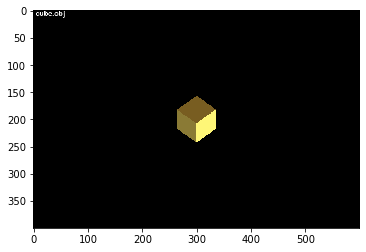

In [9]:
from matplotlib import pyplot as plt
from PIL import Image
rgba_data = pygame.image.tostring(screen, 'RGBA')
pil_img = Image.frombytes('RGBA', (width,height), rgba_data)

#from io import BytesIO
#png_data = BytesIO()
#pil_img.save(png_data, 'PNG')
#print(png_data.getvalue())

plt.imshow(pil_img)
plt.show()